In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

Step 1: Data cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In cloumns 3,4,5 most of data are missing. so we will drop them

In [6]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
data['target'] = encoder.fit_transform(data['target'])

In [12]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
data.duplicated().sum()

403

In [15]:
data = data.drop_duplicates(keep='first')


Exploratory data analysis

In [16]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [17]:
import matplotlib.pyplot as plt

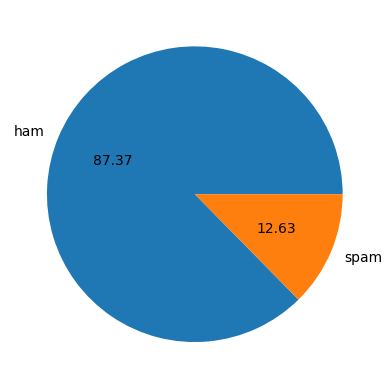

In [18]:
plt.pie(data['target'].value_counts(), labels=['ham','spam'], autopct = "%.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
data['characters'] = data['text'].apply(len)

In [22]:
data

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [23]:
data['words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
data

,target,text,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [25]:
data['sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
data

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [27]:
data.describe()

,target,characters,words,sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [28]:
data.groupby('target').describe()

characters                                                           \
            count        mean        std   min    25%    50%    75%    max   
target                                                                       
0          4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0   
1           653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0   

         words             ...              sentences                      \
         count       mean  ...   75%    max     count      mean       std   
target                     ...                                              
0       4516.0  17.123782  ...  22.0  220.0    4516.0  1.820195  1.383657   
1        653.0  27.667688  ...  32.0   46.0     653.0  2.970904  1.488425   

                                  
        min  25%  50%  75%   max  
target                            
0       1.0  1.0  1.0  2.0  38.0  
1       1.0  2.0  3.0  4.0   9.0  

[2 rows x 24 columns]

In [29]:
import seaborn as sns

<AxesSubplot: xlabel='characters', ylabel='Count'>

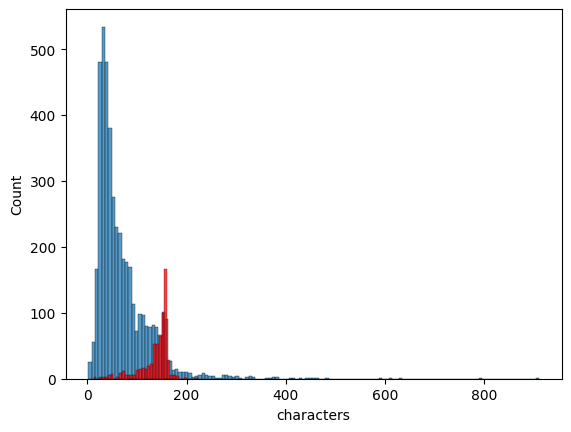

In [30]:
sns.histplot(data[data['target']==0]['characters'])
sns.histplot(data[data['target']==1]['characters'], color='red')

<AxesSubplot: xlabel='words', ylabel='Count'>

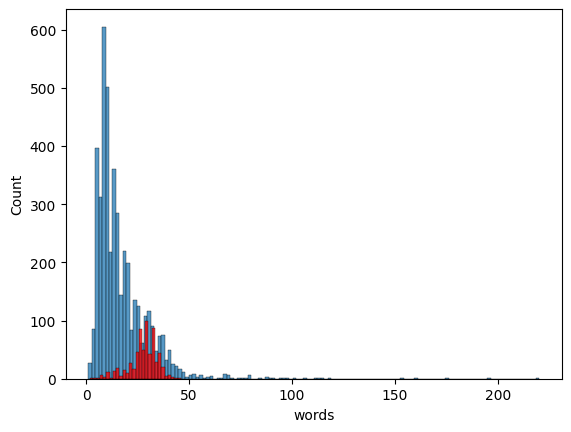

In [31]:
sns.histplot(data[data['target']==0]['words'])
sns.histplot(data[data['target']==1]['words'], color='red')

<AxesSubplot: xlabel='sentences', ylabel='Count'>

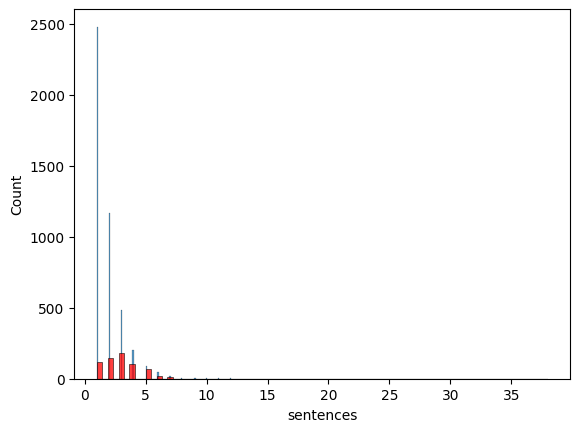

In [32]:
sns.histplot(data[data['target']==0]['sentences'])
sns.histplot(data[data['target']==1]['sentences'], color='red')

C:\Users\hp\AppData\Local\Temp\ipykernel_8928\1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

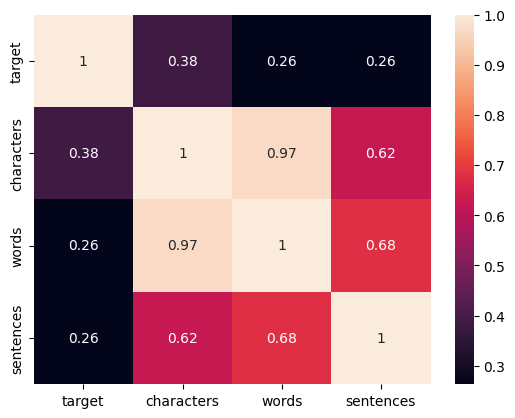

In [33]:
sns.heatmap(data.corr(), annot=True)

In [34]:
import string

In [35]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [36]:
from nltk.corpus import stopwords

In [37]:
from nltk.stem.porter import PorterStemmer

In [38]:
ps = PorterStemmer()

In [39]:
def transform_text(text):

  for x in text:
    x.lower()
  text = nltk.word_tokenize(text)

  y=[]

  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    k = ps.stem(i)
    y.append(k)

  return " ".join(y)

In [40]:
data['transformed_text'] = data['text'].apply(transform_text)

In [41]:
data

,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,thi 2nd time tri 2 contact u pound prize 2 cla...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,will b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood so suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,the guy bitch i act like interest buy someth e...


In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
cv= CountVectorizer()

In [44]:
x = cv.fit_transform(data['transformed_text']).toarray()


In [45]:
y = data['target']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [48]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
y_train

2228    0
5529    0
2149    0
5058    1
5051    0
       ..
4740    0
474     0
3266    0
4016    0
879     1
Name: target, Length: 4135, dtype: int32

In [51]:
y_test

1617    0
2064    0
1272    0
3020    0
3642    0
       ..
4146    0
1208    0
4795    1
3575    0
2820    0
Name: target, Length: 1034, dtype: int32

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [53]:
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()

In [54]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [55]:
gnb.fit(x_train, y_train)
y_pred_1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred_1))
print(precision_score(y_test, y_pred_1))
print(confusion_matrix(y_test, y_pred_1))

0.8752417794970987
0.5338983050847458
[[779 110]
 [ 19 126]]


In [56]:
mnb.fit(x_train, y_train)
y_pred_2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred_2))
print(precision_score(y_test, y_pred_2))
print(confusion_matrix(y_test, y_pred_2))

0.9758220502901354
0.8947368421052632
[[873  16]
 [  9 136]]


In [57]:
bnb.fit(x_train, y_train)
y_pred_3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred_3))
print(precision_score(y_test, y_pred_3))
print(confusion_matrix(y_test, y_pred_3))

0.9690522243713733
0.9669421487603306
[[885   4]
 [ 28 117]]


We have to take the model which have higher accuracy and more importantly higher precisison and even more important than that lowest FP value in confusion matrix. So above the 3 models bnb is the best fit

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
tfid = TfidfVectorizer()

In [60]:
x = tfid.fit_transform(data['transformed_text']).toarray()

In [61]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int32

In [62]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [63]:
gnb.fit(x_train, y_train)
y_pred_1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred_1))
print(precision_score(y_test, y_pred_1))
print(confusion_matrix(y_test, y_pred_1))

0.8704061895551257
0.5238095238095238
[[779 110]
 [ 24 121]]


In [64]:
mnb.fit(x_train, y_train)
y_pred_2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred_2))
print(precision_score(y_test, y_pred_2))
print(confusion_matrix(y_test, y_pred_2))

0.9622823984526112
0.9907407407407407
[[888   1]
 [ 38 107]]


In [65]:
bnb.fit(x_train, y_train)
y_pred_3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred_3))
print(precision_score(y_test, y_pred_3))
print(confusion_matrix(y_test, y_pred_3))

0.9690522243713733
0.9669421487603306
[[885   4]
 [ 28 117]]


So after comparison we see that the model in which we used mnb model along with tfid vectorizer are giving even better results than the previous chosen one. So we finalise the model in which we use mnb model along with tfid vectorizer.

I have used scaling in the data. In naive-bayes we cannot use the standardization since naive bayes do not accept values less than 0. So I had tried using min-max scaler. but the results were not good. so i removed scaling part.

Since naive bayes generally gives the best results in cases where we need very high precision[NOT ACCURACY] and very low FP values, there naive bayes is generally the best algorithm for most of datasets. now definitely with every dataset, the best model will change. but since our requirements are high precision and very low FP thus we are selecting the naive bayes algorithm

In [66]:
import pickle
pickle.dump(tfid, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))